In [39]:
import os

os.system('tar -zxvf dataset_roboflow.tar.gz && tar -zxvf dataset_sketch_it.tar.gz')

# !tar -zxvf dataset_roboflow.tar.gz && tar -zxvf dataset_sketch_it.tar.gz

dataset_roboflow/train/00021_png.rf.f33255cfe99ce33a5b61c360f67a8c58.jpg
dataset_roboflow/train/image_38_png.rf.e69ffcc3c101dd4cf1a1f50d8389da52.jpg
dataset_roboflow/valid/image_74_png.rf.52beed189736dbe45515e7820607e606.jpg
dataset_roboflow/new_train/00034_png.rf.cdaed64c2e2f8fe839439f6c387436e5.jpg
dataset_roboflow/new_train/image_161_png.rf.cfd20b4fe1695e91f26646da22150381.jpg
dataset_roboflow/new_train/image_97_png.rf.82f9aba938949bedc9318178f2d42292.jpg
dataset_roboflow/train/image_36_png.rf.cf8a6d8e41936d90a3ea6d59052cc4e5.jpg
dataset_roboflow/new_train/image_91_png.rf.6153c5683671b88991c985917573bc58.jpg
dataset_roboflow/train/image_182_png.rf.6a6b8609bedf8aedb3fb4208b3231579.jpg
dataset_roboflow/new_train/image_108_png.rf.81a586ab7642048a8fe556320feb4af2.jpg
dataset_roboflow/train/image_55_png.rf.3f895c00b966af76d1057ee8f2218ace.jpg
dataset_roboflow/train/image_107_png.rf.f48cbcdeaf88cb6aad0a97358d70e81c.jpg
dataset_roboflow/train/image_200_png.rf.35c299086ff7729f94fae9568a5748

dataset_sketch_it/images/722b8c8f-7975-4fc7-abde-b27b3bd37883.png
dataset_sketch_it/images/6bec6664-a131-4e83-ae7d-afa331892d7c.png
dataset_sketch_it/images/9bf34aeb-8b91-4061-b67e-cc08a3c7d177.png
dataset_sketch_it/images/52840896-0073-4c1f-9aca-bbd87c17eac9.png
dataset_sketch_it/images/8cea0797-e148-4eff-be0a-08bd8dad494a.png
dataset_sketch_it/images/c237d277-27c4-465d-b2d6-e4eca2c069ed.png
dataset_sketch_it/images/bdd7286c-6da8-4caa-a7a0-ffcaa7e0ba02.png
dataset_sketch_it/images/770c6fbf-1046-4de3-a892-c1d53a9209ae.png
dataset_sketch_it/images/1f9739ba-e178-4e15-add5-9b21ca8dc85d.png
dataset_sketch_it/.ipynb_checkpoints/
dataset_sketch_it/images/e6b36cb6-83a0-4865-8b33-52822722ef50.png
dataset_sketch_it/images/dfca0ee0-9e19-49ed-b25c-149a9a713335.png
dataset_sketch_it/images/94b81e83-315e-41d6-ad36-17ba9a565070.png
dataset_sketch_it/images/d8f269e4-8ecb-4b5b-86ea-4839fb1a6e18.png
dataset_sketch_it/images/d8583058-613e-4990-8973-5a231de3467b.png
dataset_sketch_it/images/54c3f644-5aba

0

In [2]:
new_dataset_path='./new_dataset/'


In [3]:
import numpy as np
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

import torch, detectron2

# COMMON LIBRARIES
import os
import cv2

from datetime import datetime
# from google.colab.patches import cv2_imshow
from PIL import Image
from matplotlib import pyplot as plt
# %matplotlib inline

# DATA SET PREPARATION AND LOADING
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

# VISUALIZATION
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

# CONFIGURATION
from detectron2 import model_zoo
from detectron2.config import get_cfg

# EVALUATION
from detectron2.engine import DefaultPredictor

# TRAINING
from detectron2.engine import DefaultTrainer

# from keras_retinanet import models/
# from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
# from keras_retinanet.utils.visualization import draw_box, draw_caption
# from keras_retinanet.utils.colors import label_color

# %matplotlib inline
# %config InlineBackend.figure_format='retina'

register_matplotlib_converters()


RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)


In [4]:
THRES_SCORE = 0.4

def draw_detections(image, box, scores=0, label=''):
#   for box, score, label in zip(boxes[0], scores[0], labels[0]):
#     if score < THRES_SCORE:
#         continue

#     color = label_color(labels)

#     box = box.astype(int)
    
    draw_box(image, box, color=(0,255,0) )

    caption = "{} {:.3f}".format(label, 0)
    draw_caption(image, box, caption)
    
    
    

def show_detected_objects(image_row,img_folder=''):
    
    img_path = img_folder+image_row.filename
    true_box = [
        image_row.xmin, image_row.ymin, image_row.xmax, image_row.ymax]
    image = read_image_bgr(img_path)

    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    image = preprocess_image(image)
    image, scale = resize_image(image)

#     boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis = 0))
#     print('scale',scale)
#     print('scores',scores)
#     print('labels',labels)
#     print('image',image)

#     boxes /= scale
#     print('boxes',boxes[0])

    draw_box(draw, true_box, color=(255, 0, 0))
    draw_detections(image, box=true_box, label= labels_to_name)
    
#     caption = "{} {:.3f}".format(image_row.class_name,0)
#     draw_caption(image,true_box , image_row.class_name)

    plt.axis('off')
    plt.imshow(draw)
    plt.show()

In [5]:
roboflow = pd.read_csv('dataset_roboflow/new_train/annotations.csv')
sketch_it = pd.read_csv('dataset_sketch_it/images/annotations.csv')

In [6]:
roboflow

,image_name,width,height,class_name,x_min,y_min,x_max,y_max
0,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,95,98,345,157
1,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,102,244,342,309
2,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Button,106,542,372,614
3,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,12,160,139,400
4,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,191,151,306,395
...,...,...,...,...,...,...,...,...
4577,images_14_png.rf.2e1996b917db3d4b700281e422338...,640,640,Carousel,44,288,621,415
4578,images_14_png.rf.2e1996b917db3d4b700281e422338...,640,640,Carousel,27,157,257,275
4579,images_14_png.rf.2e1996b917db3d4b700281e422338...,640,640,Carousel,277,153,620,269
4580,images_14_png.rf.2e1996b917db3d4b700281e422338...,640,640,Carousel,319,34,607,133


In [7]:
sketch_it

,image_name,width,height,class_name,x_min,y_min,x_max,y_max
0,2469da39-65f0-428b-a1de-cedbba7db32e.png,1600,564,CheckBox,423,332,690,414
1,2469da39-65f0-428b-a1de-cedbba7db32e.png,1600,564,Button,989,422,1186,554
2,2469da39-65f0-428b-a1de-cedbba7db32e.png,1600,564,Label,18,146,328,207
3,2469da39-65f0-428b-a1de-cedbba7db32e.png,1600,564,CheckBox,989,220,1292,294
4,2469da39-65f0-428b-a1de-cedbba7db32e.png,1600,564,RadioButton,804,107,952,168
...,...,...,...,...,...,...,...,...
1996,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,453,628,645,678
1997,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,133,734,369,855
1998,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,300,204,1072,478
1999,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,752,639,983,679


In [8]:
new_dataset = roboflow.append(sketch_it,ignore_index=True)
new_dataset

/tmp/ipykernel_14515/2169078318.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataset = roboflow.append(sketch_it,ignore_index=True)


,image_name,width,height,class_name,x_min,y_min,x_max,y_max
0,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,95,98,345,157
1,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,102,244,342,309
2,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Button,106,542,372,614
3,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,12,160,139,400
4,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,191,151,306,395
...,...,...,...,...,...,...,...,...
6578,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,453,628,645,678
6579,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,133,734,369,855
6580,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,300,204,1072,478
6581,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,752,639,983,679


In [9]:
new_dataset.rename(columns={'image_name': 'filename'}, inplace=True)
new_dataset.rename(columns={'x_min': 'xmin'}, inplace=True)
new_dataset.rename(columns={'y_min': 'ymin'}, inplace=True)
new_dataset.rename(columns={'x_max': 'xmax'}, inplace=True)
new_dataset.rename(columns={'y_max': 'ymax'}, inplace=True)
new_dataset.rename(columns={'class_name': 'label'}, inplace=True)


roboflow.rename(columns={'image_name': 'filename'}, inplace=True)
roboflow.rename(columns={'x_min': 'xmin'}, inplace=True)
roboflow.rename(columns={'y_min': 'ymin'}, inplace=True)
roboflow.rename(columns={'x_max': 'xmax'}, inplace=True)
roboflow.rename(columns={'y_max': 'ymax'}, inplace=True)
roboflow.rename(columns={'class_name': 'label'}, inplace=True)

sketch_it.rename(columns={'image_name': 'filename'}, inplace=True)
sketch_it.rename(columns={'x_min': 'xmin'}, inplace=True)
sketch_it.rename(columns={'y_min': 'ymin'}, inplace=True)
sketch_it.rename(columns={'x_max': 'xmax'}, inplace=True)
sketch_it.rename(columns={'y_max': 'ymax'}, inplace=True)
sketch_it.rename(columns={'class_name': 'label'}, inplace=True)

new_dataset

,filename,width,height,label,xmin,ymin,xmax,ymax
0,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,95,98,345,157
1,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,102,244,342,309
2,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Button,106,542,372,614
3,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,12,160,139,400
4,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,191,151,306,395
...,...,...,...,...,...,...,...,...
6578,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,453,628,645,678
6579,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,133,734,369,855
6580,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,300,204,1072,478
6581,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,752,639,983,679


In [10]:
import shutil
from PIL import Image
import cv2
import imghdr

def copy2dri(df,destination,fromDir=[]):

    print(destination)

    for i in df.filename: 


    #     create dir
        if not os.path.exists(destination):
            os.makedirs(destination)

        for Dir in fromDir:
#             print(f'{Dir+i} -')
            
            if os.path.exists(Dir+i):
                pli_img = Image.open(Dir+i)  
                cv_img = cv2.imread(Dir+i)

#                 print(f'{Dir+i} - {pli_img.format}')
        #         cv2.imwrite(destination+'/'+i, cv_img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])  
                shutil.copy2(Dir+i,destination)


    df.to_csv(destination+'/annotations.csv',index=False)      

    return 'done'

# filter by accpted classes

In [11]:
labels_to_name=pd.DataFrame( new_dataset['label'].unique()).sort_values(by=0)
labels_to_name

,0
1,Button
11,Carousel
5,CheckBox
14,ComboBox
9,Heading
2,Image
10,Label
7,Link
13,Pagination
4,Paragraph


In [12]:
new_dataset.label.value_counts()

Label          1075
TextBox         719
CheckBox        695
Button          643
Image           592
Link            491
Heading         490
RadioButton     416
Paragraph       360
Select          351
Table           214
Carousel        178
Textarea        151
Pagination      150
ComboBox         58
Name: label, dtype: int64

In [13]:
accpted_classes = pd.read_csv('./accpted_classes.csv')
accpted_classes

,class_label
0,Button
1,CheckBox
2,Heading
3,Image
4,Label
5,Link
6,Paragraph
7,RadioButton
8,Select
9,TextBox


In [14]:
accpted_classes_list = accpted_classes.values.reshape(1,-1)[0]

classes = []

for i,item in enumerate(accpted_classes_list):
        classes.append({'name':item, 'id':i+1})


with open('label_map.pbtxt', 'w') as f:
    for item in classes:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(item['name']))
        f.write('\tid:{}\n'.format(item['id']))
        f.write('}\n') 

In [15]:
new_dataset = new_dataset[new_dataset.label.isin(list(accpted_classes.values.reshape(1,-1)[0]))]
new_dataset
# accpted_classes.values.reshape(1,-1)[0]

,filename,width,height,label,xmin,ymin,xmax,ymax
0,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,95,98,345,157
1,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,102,244,342,309
2,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Button,106,542,372,614
3,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,12,160,139,400
4,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,191,151,306,395
...,...,...,...,...,...,...,...,...
6578,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,453,628,645,678
6579,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,133,734,369,855
6580,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,300,204,1072,478
6581,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,752,639,983,679


In [16]:

copy2dri(destination=new_dataset_path,df= new_dataset,fromDir=['dataset_roboflow/new_train/','dataset_sketch_it/images/'])

# destination='./new_dataset'
# 'dataset_roboflow/new_train/'
# 'dataset_sketch_it/images/'

./new_dataset/


'done'

In [17]:
new_dataset = pd.read_csv('./new_dataset/annotations.csv')
new_dataset

,filename,width,height,label,xmin,ymin,xmax,ymax
0,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,95,98,345,157
1,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,102,244,342,309
2,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Button,106,542,372,614
3,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,12,160,139,400
4,00027_png.rf.051c242efd7c63dbc96a34fdfc9e8499.jpg,640,640,Image,191,151,306,395
...,...,...,...,...,...,...,...,...
5827,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,453,628,645,678
5828,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,133,734,369,855
5829,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Paragraph,300,204,1072,478
5830,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Heading,752,639,983,679


# show all object

# create coco from csv

In [18]:
import numpy as np
import json
import pandas as pd

# path = 'tensorflow2csv.csv'
save_json_path = 'new_dataset_coco.json'

def csv2coco( data ,save_json_path):

#     data = new_dataset.copy()

    images = []
    categories = []
    annotations = []

    category = {}
    category["supercategory"] = 'none'
    category["id"] = 0
    category["name"] = 'None'
    categories.append(category)

    data['fileid'] = data['filename'].astype('category').cat.codes
    data['categoryid']= pd.Categorical(data['label'],ordered= True).codes
    data['categoryid'] = data['categoryid']+1
    data['annid'] = data.index

    def image(row):
        image = {}
        image["height"] = row.height
        image["width"] = row.width
        image["id"] = row.fileid
        image["file_name"] = row.filename
        return image

    def category(row):
        category = {}
        category["supercategory"] = 'None'
        category["id"] = row.categoryid
        category["name"] = row.label
        return category

    def annotation(row):
        annotation = {}
        area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
        annotation["segmentation"] = []
        annotation["iscrowd"] = 0
        annotation["area"] = area
        annotation["image_id"] = row.fileid

        annotation["bbox"] = [row.xmin, row.ymin, row.xmax -row.xmin,row.ymax-row.ymin ]

        annotation["category_id"] = row.categoryid
        annotation["id"] = row.annid
        return annotation

    for row in data.itertuples():
        annotations.append(annotation(row))

    imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
    for row in imagedf.itertuples():
        images.append(image(row))

    catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
    for row in catdf.itertuples():
        categories.append(category(row))

    data_coco = {}
    data_coco["images"] = images
    data_coco["categories"] = categories
    data_coco["annotations"] = annotations


    json.dump(data_coco, open(save_json_path, "w"), indent=4)

In [19]:
csv2coco(new_dataset.copy(),'new_dataset/annotations.coco.json')

In [20]:



# for i in range(3):
#     item = new_dataset.iloc[i]
#     print(f'{i}- {item.filename} - {item.label}')
#     show_detected_objects(item,img_folder='new_dataset/')

In [21]:
DATA_SET_NAME = 'new_dataset'
ANNOTATIONS_FILE_NAME = "annotations.coco.json"

In [22]:
# TRAIN SET
DATA_SET_NAME = f"{DATA_SET_NAME}"
DATA_SET_IMAGES_DIR_PATH = os.path.join(DATA_SET_NAME)
DATA_SET_ANN_FILE_PATH = os.path.join(DATA_SET_NAME, ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=DATA_SET_NAME, 
    metadata={}, 
    json_file=DATA_SET_ANN_FILE_PATH, 
    image_root=DATA_SET_IMAGES_DIR_PATH
)


In [23]:
[
    data_set
    for data_set
    in MetadataCatalog.list()
    if data_set.startswith(DATA_SET_NAME)
]

['new_dataset']


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



['None', 'Button', 'CheckBox', 'Heading', 'Image', 'Label', 'Link', 'Paragraph', 'RadioButton', 'Select', 'TextBox']


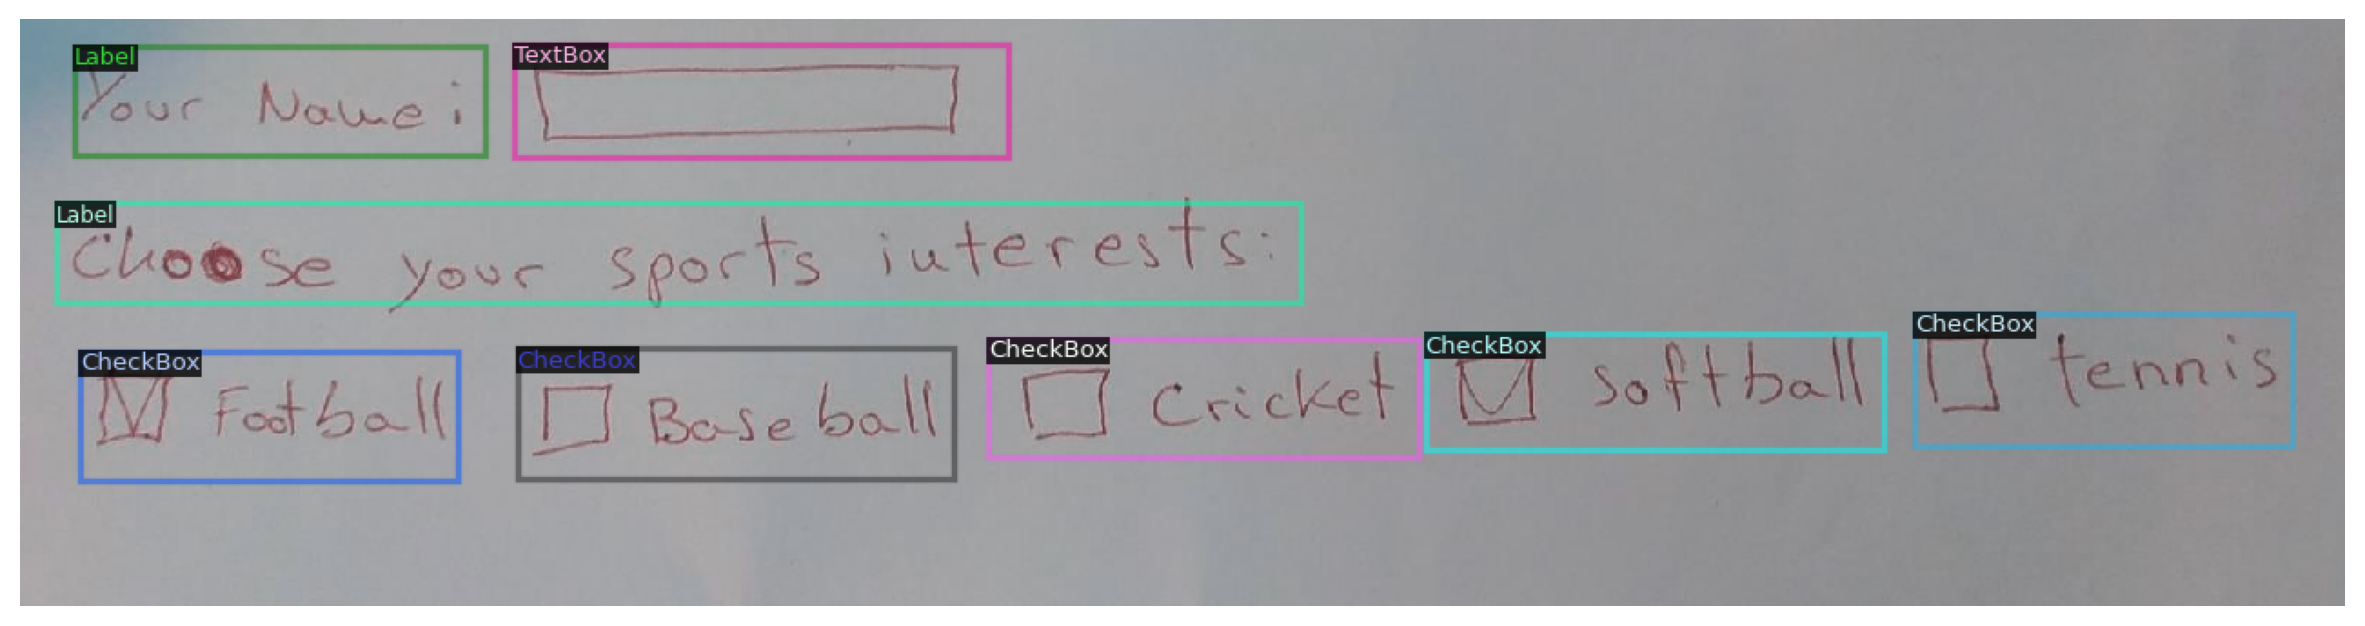

In [24]:
import random

metadata = MetadataCatalog.get(DATA_SET_NAME)
dataset_train = DatasetCatalog.get(DATA_SET_NAME)

print(metadata.thing_classes)

dataset_entry = dataset_train[random.choice(range(0,len(dataset_train)))]
image = cv2.imread(dataset_entry["file_name"])

visualizer = Visualizer(
    image[:, :, ::-1],
    metadata=metadata, 
    scale=0.8, 
    instance_mode=ColorMode.IMAGE_BW
)

out = visualizer.draw_dataset_dict(dataset_entry)
# cv2_imshow(out.get_image()[:, :, ::-1])

plt.figure(figsize=(15,10))
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()

# spilt into train and test

In [25]:
new_dataset.label.value_counts()

Label          1075
TextBox         719
CheckBox        695
Button          643
Image           592
Link            491
Heading         490
RadioButton     416
Paragraph       360
Select          351
Name: label, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
import shutil


if os.path.exists('train'):
    shutil.rmtree('train')
    
if os.path.exists('test'):
    shutil.rmtree('test')

train_set = pd.DataFrame([])
test_set = pd.DataFrame([])
lbls = new_dataset.label.unique().tolist()

for lbl in lbls:

    train, test = train_test_split(new_dataset[new_dataset['label']==lbl], test_size = 0.2,shuffle=False)
    train_set=train_set.append(train,ignore_index=True)
    test_set=test_set.append(test,ignore_index=True)
    

/tmp/ipykernel_14515/2304795069.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set=train_set.append(train,ignore_index=True)
/tmp/ipykernel_14515/2304795069.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_set=test_set.append(test,ignore_index=True)


In [27]:
train_set

,filename,width,height,label,xmin,ymin,xmax,ymax
0,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,95,98,345,157
1,00024_png.rf.097dd8beb3a90a32588e3b7d14105214.jpg,640,640,Select,102,244,342,309
2,image_39_png.rf.04c788edb4426a597353f2ce7ebbe4...,640,640,Select,31,0,138,19
3,image_39_png.rf.04c788edb4426a597353f2ce7ebbe4...,640,640,Select,31,38,139,55
4,image_39_png.rf.04c788edb4426a597353f2ce7ebbe4...,640,640,Select,32,78,148,96
...,...,...,...,...,...,...,...,...
4657,54f95c56-6e1e-42b9-b0ee-2f9de7134c6e.png,1200,900,Label,470,687,683,735
4658,54f95c56-6e1e-42b9-b0ee-2f9de7134c6e.png,1200,900,Label,780,666,1009,719
4659,54f95c56-6e1e-42b9-b0ee-2f9de7134c6e.png,1200,900,Label,169,711,378,757
4660,7f288e89-a0fb-4f69-b6e8-458faae5915f.png,1200,900,Label,439,675,631,734


In [28]:
test_set

,filename,width,height,label,xmin,ymin,xmax,ymax
0,image_198_png.rf.7bf38b73e026959c122edf31c4aee...,640,640,Select,51,20,242,52
1,image_198_png.rf.7bf38b73e026959c122edf31c4aee...,640,640,Select,47,67,237,95
2,image_198_png.rf.7bf38b73e026959c122edf31c4aee...,640,640,Select,50,112,237,136
3,image_198_png.rf.7bf38b73e026959c122edf31c4aee...,640,640,Select,255,110,459,134
4,image_198_png.rf.7bf38b73e026959c122edf31c4aee...,640,640,Select,259,55,450,81
...,...,...,...,...,...,...,...,...
1165,938936cd-9222-4a2a-a46a-cbb9e25d232c.png,1200,900,Label,757,679,1011,746
1166,938936cd-9222-4a2a-a46a-cbb9e25d232c.png,1200,900,Label,453,675,672,740
1167,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Label,462,687,666,730
1168,39f28af1-a6d1-4620-9d9d-840450a1e6a2.png,1200,900,Label,756,680,995,740


In [29]:
copy2dri(destination='train/',df= train_set,fromDir=[new_dataset_path])


train/


'done'

In [30]:
copy2dri(destination='test/',df= test_set,fromDir=[new_dataset_path])


test/


'done'

In [31]:
# test_set = pd.read_csv('test/annotations.csv')
# train_set = pd.read_csv('train/annotations.csv')

# create coco from csv

In [32]:
import numpy as np
import json
import pandas as pd

# path = 'tensorflow2csv.csv'
save_json_path = 'new_dataset_coco.json'

def csv2coco( data ,save_json_path):

#     data = new_dataset.copy()

    images = []
    categories = []
    annotations = []

    category = {}
    category["supercategory"] = 'none'
    category["id"] = 0
    category["name"] = 'None'
    categories.append(category)

    data['fileid'] = data['filename'].astype('category').cat.codes
    data['categoryid']= pd.Categorical(data['label'],ordered= True).codes
    data['categoryid'] = data['categoryid']+1
    data['annid'] = data.index

    def image(row):
        image = {}
        image["height"] = row.height
        image["width"] = row.width
        image["id"] = row.fileid
        image["file_name"] = row.filename
        return image

    def category(row):
        category = {}
        category["supercategory"] = 'None'
        category["id"] = row.categoryid
        category["name"] = row.label
        return category

    def annotation(row):
        annotation = {}
        area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
        annotation["segmentation"] = []
        annotation["iscrowd"] = 0
        annotation["area"] = area
        annotation["image_id"] = row.fileid

        annotation["bbox"] = [row.xmin, row.ymin, row.xmax -row.xmin,row.ymax-row.ymin ]

        annotation["category_id"] = row.categoryid
        annotation["id"] = row.annid
        return annotation

    for row in data.itertuples():
        annotations.append(annotation(row))

    imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
    for row in imagedf.itertuples():
        images.append(image(row))

    catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
    for row in catdf.itertuples():
        categories.append(category(row))

    data_coco = {}
    data_coco["images"] = images
    data_coco["categories"] = categories
    data_coco["annotations"] = annotations


    json.dump(data_coco, open(save_json_path, "w"), indent=4)

In [33]:
csv2coco(train_set.copy(),'train/annotations.coco.json')

In [34]:
csv2coco(test_set.copy(),'test/annotations.coco.json')

# create tf record

In [35]:

# from __future__ import division
# from __future__ import print_function
# from __future__ import absolute_import

import os
import io
import sys
import pandas as pd
import tensorflow.compat.v1 as tf
# import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util, label_map_util
from collections import namedtuple, OrderedDict

# flags = tf.app.flags
# flags.DEFINE_string('csv_input', '', 'Path to the CSV input')
# flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
# flags.DEFINE_string('image_dir', '', 'Path to images')
# FLAGS = flags.FLAGS

class_map = label_map_util.load_labelmap('label_map.pbtxt')
class_map_dict = label_map_util.get_label_map_dict(class_map)

# print(class_map_dict)



# TO-DO replace this with label map
def class_text_to_int(row_label):
    return class_map_dict[row_label]


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)

    width, height = image.size

#     print(encoded_jpg)
    
    filename = group.filename.encode('utf8')
#     print(image_name)
    image_format = image.format.encode()
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes_num = []

    for index, row in group.object.iterrows():
#         print(row['x_min'])
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['label'].encode('utf8'))
        classes_num.append(class_text_to_int(row['label']))
        
#     print(image_format)


    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes_num),
    }))
        
    return tf_example


def csv_2_tfrecord(output_path,image_dir,csv_input):
    
    writer = tf.python_io.TFRecordWriter(output_path)
    path = os.path.join(image_dir)
    examples = pd.read_csv(csv_input)
    grouped = split(examples, 'filename')
#     print(grouped)
    

    # added
    file_errors = 0

    for group in grouped:
        try:
            tf_example = create_tf_example(group, path)            
            writer.write(tf_example.SerializeToString())
        except:

            # added
            file_errors += 1
            pass

    writer.close()

    # added
    print("FINISHED. There were %d errors" % file_errors)

    output_path = os.path.join(os.getcwd(), output_path)
    print('Successfully created the TFRecords: {}'.format(output_path))

    
# call
csv_2_tfrecord(csv_input='train/annotations.csv',
              image_dir='train/',
              output_path= 'train.record')

csv_2_tfrecord(csv_input='test/annotations.csv',
              image_dir='test/',
              output_path= 'test.record')





2023-05-10 11:15:50.418218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 11:15:52.093235: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


FINISHED. There were 0 errors
Successfully created the TFRecords: /home/uwu/Desktop/object detection/sketch web ui dataset/train.record
FINISHED. There were 0 errors
Successfully created the TFRecords: /home/uwu/Desktop/object detection/sketch web ui dataset/test.record


In [ ]:
classes